In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/LENOVO/Desktop/Clases/Minería de datos/Github/ProyectoDataMining/defunciones/Defunciones.csv", header = "infer", delimiter = ",", encoding = "latin-1")

C:\Users\LENOVO\anaconda3\envs\keras\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (17,28) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,depreg,mupreg,mesreg,añoreg,depocu,mupocu,areag,sexo,diaocu,mesocu,...,dredif,mredif,caudef,asist,ocur,cerdef,escodif,pnadif,predif,ciuodif
0,5,505,1,9,5,505,9.0,1,2,1,...,1,101,Y214,1,3,1,NaN,NaN,NaN,NaN
1,1,101,9,9,1,101,9.0,1,27,9,...,1,101,X919,4,3,1,NaN,NaN,NaN,NaN
2,22,2206,9,9,22,2206,9.0,2,23,8,...,1,101,X959,4,3,2,NaN,NaN,NaN,NaN
3,2,201,12,9,2,201,9.0,1,5,12,...,1,101,V899,4,3,1,NaN,NaN,NaN,NaN
4,1,101,5,9,1,101,9.0,2,7,5,...,1,101,X709,4,3,1,NaN,NaN,NaN,NaN


In [4]:
df.isna().sum()

depreg          0
mupreg          0
mesreg          0
añoreg          0
depocu          0
mupocu          0
areag      168671
sexo            0
diaocu          0
mesocu          0
añoocu          0
edadif          0
perdif          0
puedif          0
ecidif          0
ocudif     565215
dnadif          0
mnadif          0
nacdif          0
dredif          0
mredif          0
caudef          0
asist           0
ocur            0
cerdef          0
escodif     71707
pnadif     216809
predif     216809
ciuodif    289466
dtype: int64

In [5]:
len(df)

854681

In [6]:
o=df.isnull()

mask=o.any(axis = 1)

In [7]:
muchos_nas = ["escodif","ciuodif","pnadif","predif","ocudif"]

In [8]:
columnas = df.columns
columnas

Index(['depreg', 'mupreg', 'mesreg', 'añoreg', 'depocu', 'mupocu', 'areag',
       'sexo', 'diaocu', 'mesocu', 'añoocu', 'edadif', 'perdif', 'puedif',
       'ecidif', 'ocudif', 'dnadif', 'mnadif', 'nacdif', 'dredif', 'mredif',
       'caudef', 'asist', 'ocur', 'cerdef', 'escodif', 'pnadif', 'predif',
       'ciuodif'],
      dtype='object')

In [9]:
df["añoreg"].unique()

array([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype=int64)

In [10]:
df["añoocu"].unique()

array([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype=int64)

In [11]:
corr=df.corr(method = 'spearman')

In [12]:
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,depreg,mupreg,mesreg,añoreg,depocu,mupocu,areag,sexo,diaocu,mesocu,añoocu,edadif,perdif,puedif,ecidif,ocudif,dnadif,nacdif,dredif,mredif,asist,ocur,cerdef,escodif,pnadif,predif
depreg,1.00,0.99,-0.01,0.00,0.99,0.98,0.43,0.01,0.00,-0.00,0.00,-0.01,-0.01,-0.18,-0.05,-0.03,0.67,-0.01,0.76,0.76,0.40,0.23,0.27,-0.21,-0.03,-0.02
mupreg,0.99,1.00,-0.01,-0.00,0.98,0.98,0.45,0.01,0.00,-0.00,-0.00,-0.01,-0.00,-0.19,-0.05,-0.03,0.66,-0.01,0.75,0.75,0.42,0.26,0.29,-0.22,-0.03,-0.02
mesreg,-0.01,-0.01,1.00,-0.01,-0.01,-0.01,-0.01,0.00,-0.00,0.88,-0.01,0.00,0.00,-0.00,0.00,-0.01,-0.01,0.00,-0.01,-0.01,-0.01,-0.01,0.01,0.01,-0.00,0.01
añoreg,0.00,-0.00,-0.01,1.00,0.00,0.01,-0.02,0.02,0.00,-0.00,1.00,0.05,0.01,0.03,-0.02,-0.05,-0.00,0.44,0.04,0.05,0.04,0.14,0.17,-0.03,-0.01,0.06
depocu,0.99,0.98,-0.01,0.00,1.00,0.99,0.43,0.01,0.00,-0.00,0.00,-0.01,-0.01,-0.18,-0.05,-0.03,0.67,-0.01,0.76,0.75,0.41,0.24,0.28,-0.21,-0.02,-0.02
mupocu,0.98,0.98,-0.01,0.01,0.99,1.00,0.45,0.01,0.00,0.00,0.01,-0.00,0.00,-0.19,-0.04,-0.03,0.65,-0.01,0.74,0.74,0.43,0.28,0.29,-0.21,-0.02,-0.02
areag,0.43,0.45,-0.01,-0.02,0.43,0.45,1.00,0.00,0.00,-0.00,-0.02,0.03,0.06,-0.22,-0.02,-0.02,0.22,-0.01,0.29,0.30,0.62,0.51,0.40,-0.19,-0.02,-0.02
sexo,0.01,0.01,0.00,0.02,0.01,0.01,0.00,1.00,0.00,0.00,0.02,0.11,-0.00,-0.02,-0.03,0.33,0.02,-0.00,-0.01,-0.01,-0.03,0.01,0.01,-0.13,-0.03,-0.02
diaocu,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.02,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00
mesocu,-0.00,-0.00,0.88,-0.00,-0.00,0.00,-0.00,0.00,0.02,1.00,-0.00,0.01,0.01,-0.01,0.00,-0.01,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.02,0.01,-0.00,0.00


In [13]:
x=np.array([[0],[1],[2],[3],[4]]*6).reshape(30)
y =np.array([[0],[1],[2],[3],[4],[5]]*5).reshape(30)
            


In [14]:
df2 =  df.sample(n = 100000, random_state = 666)
df2 = df.infer_objects()
df2.dtypes

depreg       int64
mupreg       int64
mesreg       int64
añoreg       int64
depocu       int64
mupocu       int64
areag      float64
sexo         int64
diaocu       int64
mesocu       int64
añoocu       int64
edadif       int64
perdif       int64
puedif       int64
ecidif       int64
ocudif     float64
dnadif       int64
mnadif      object
nacdif       int64
dredif       int64
mredif       int64
caudef      object
asist        int64
ocur         int64
cerdef       int64
escodif    float64
pnadif     float64
predif     float64
ciuodif     object
dtype: object

In [15]:
df2_numeric = df2.select_dtypes(include = np.number)

In [16]:
columnas_numericas  = df2_numeric.columns

KeyboardInterrupt: 

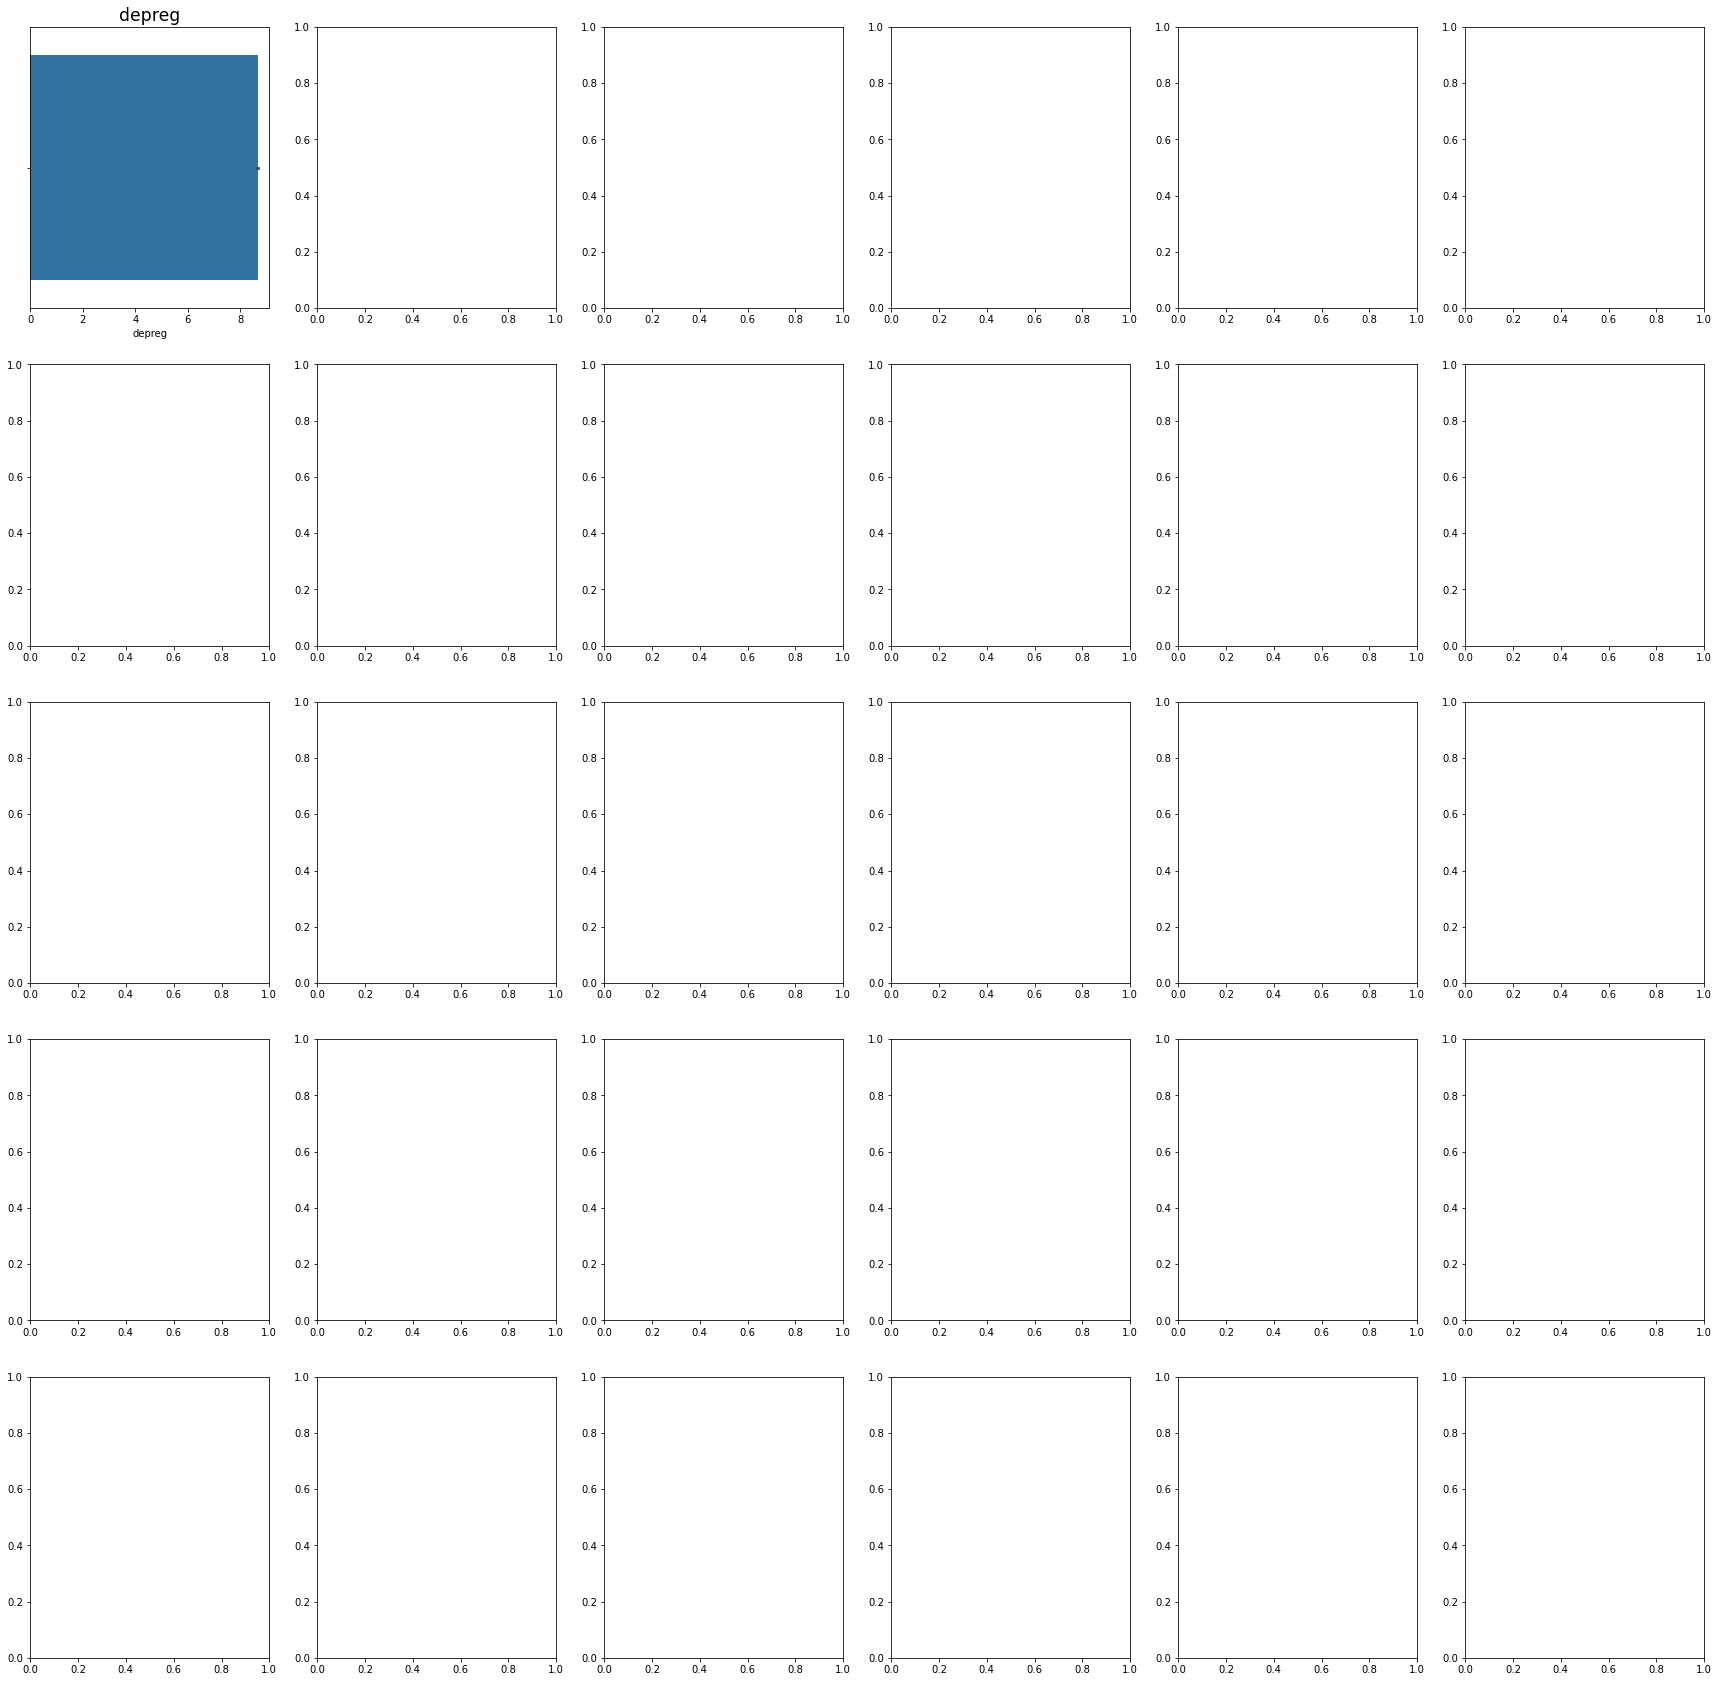

In [27]:
contador = 0
fig, axs = plt.subplots(5,6, figsize=(30,30))
for i in range(0,29):
    sns.barplot(ax = axs[x[i],y[i]],data =df2_numeric , x = columnas_numericas[i], hue =  "añoreg")
    axs[x[i],y[i]].set_title(columnas[i], fontsize = "xx-large")


C:\Users\LENOVO\anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


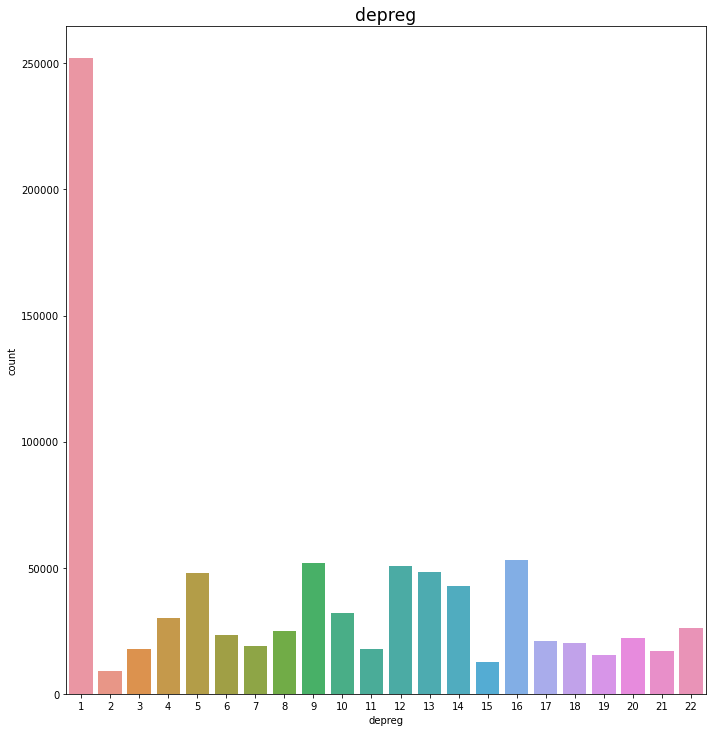

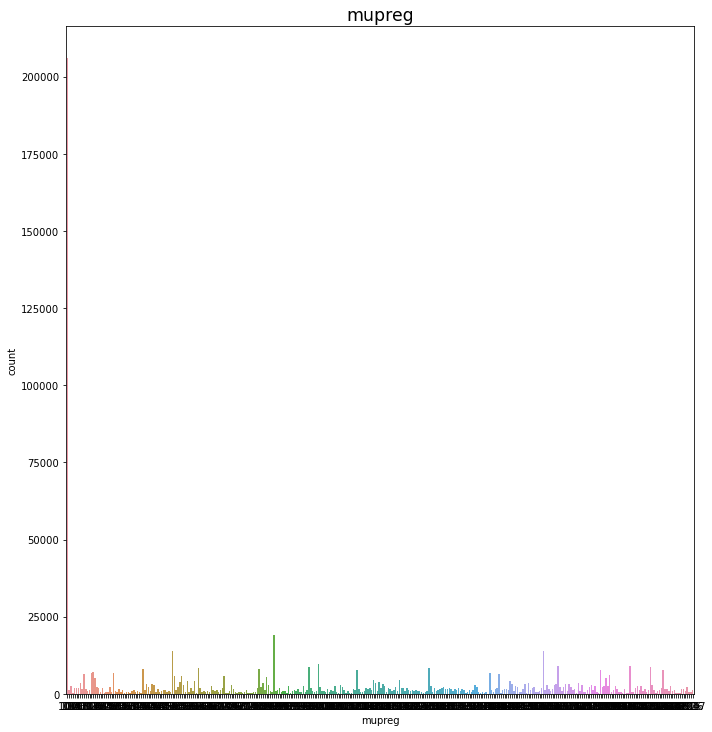

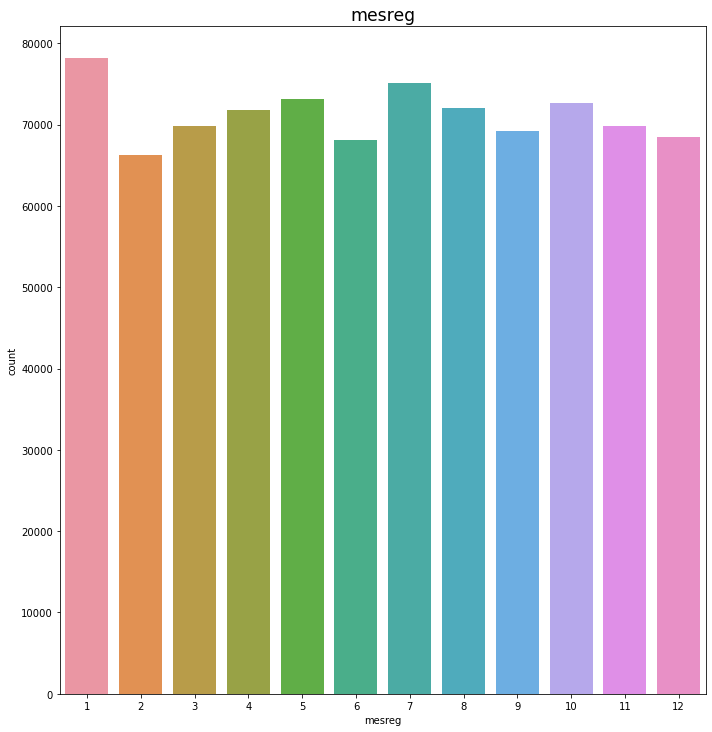

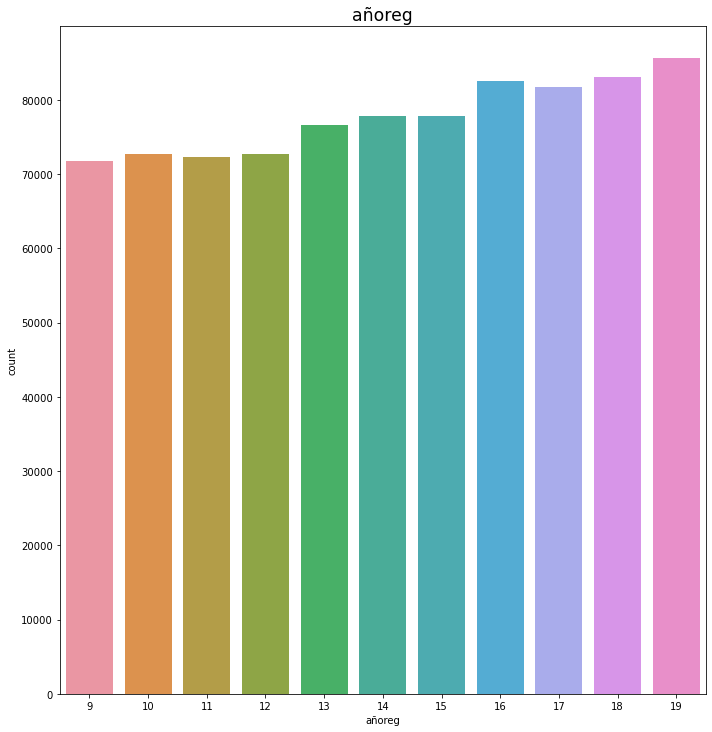

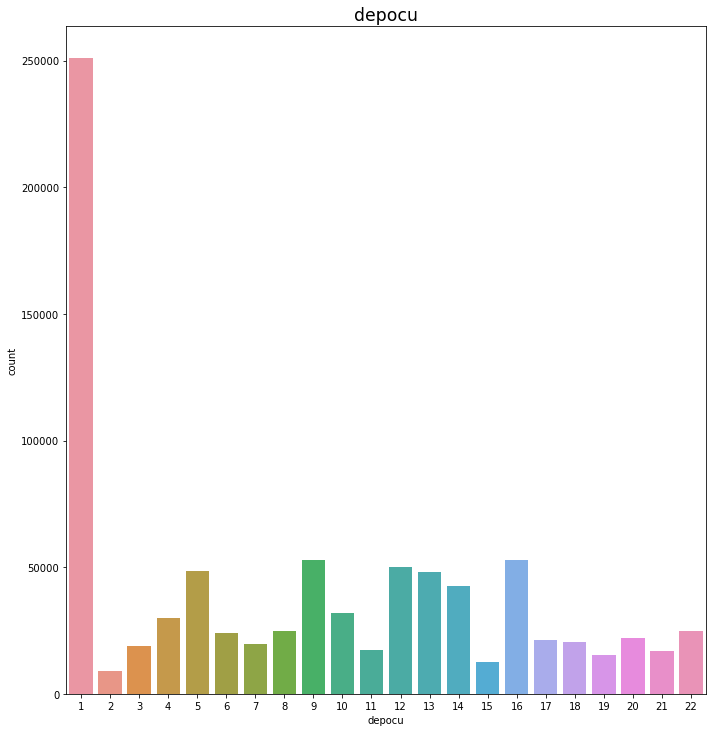

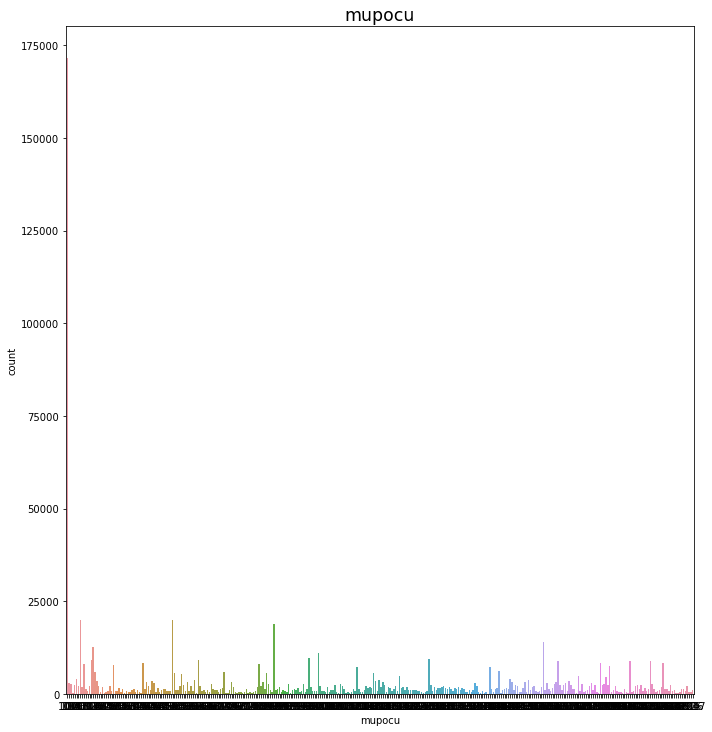

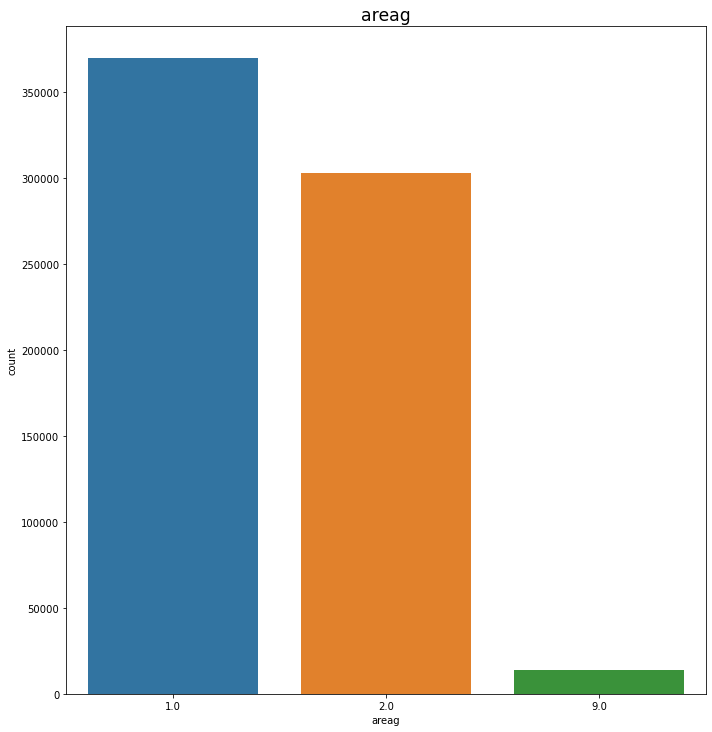

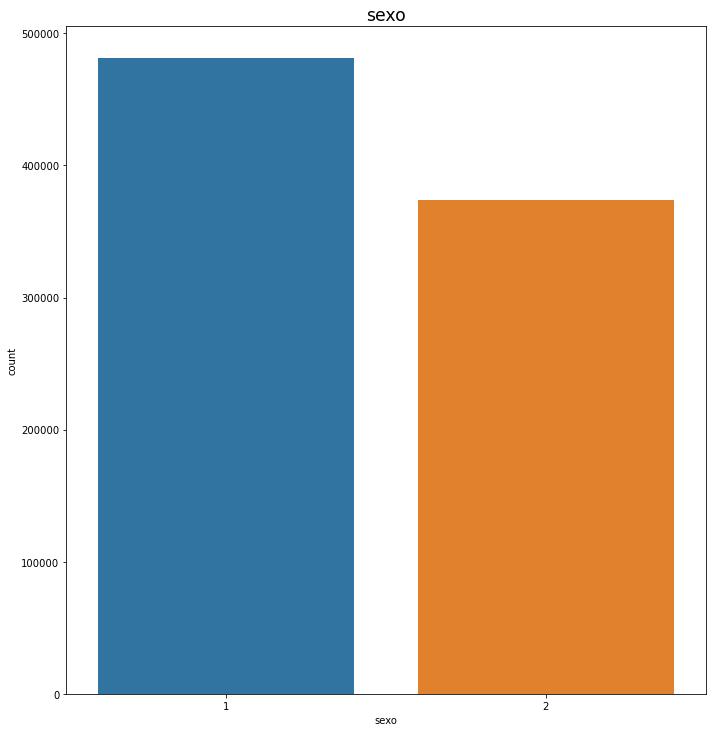

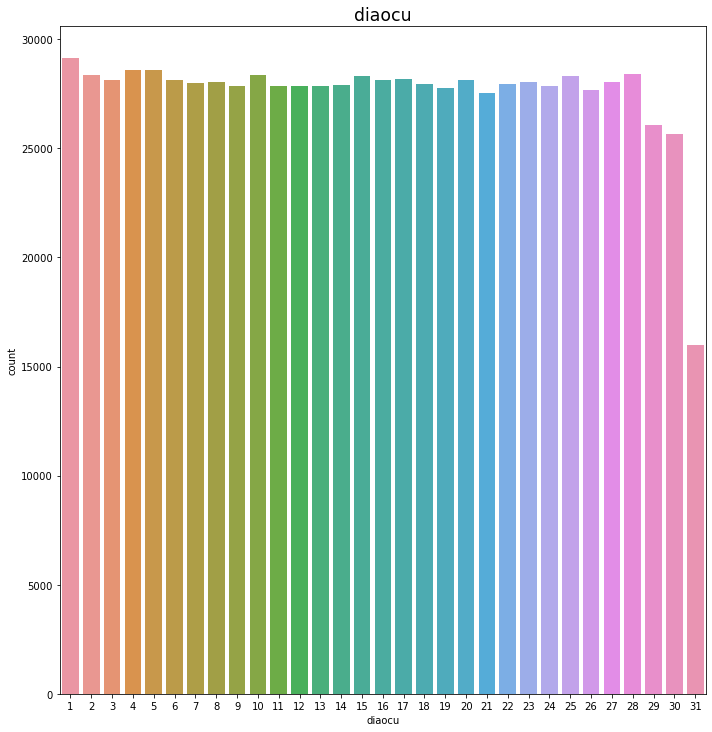

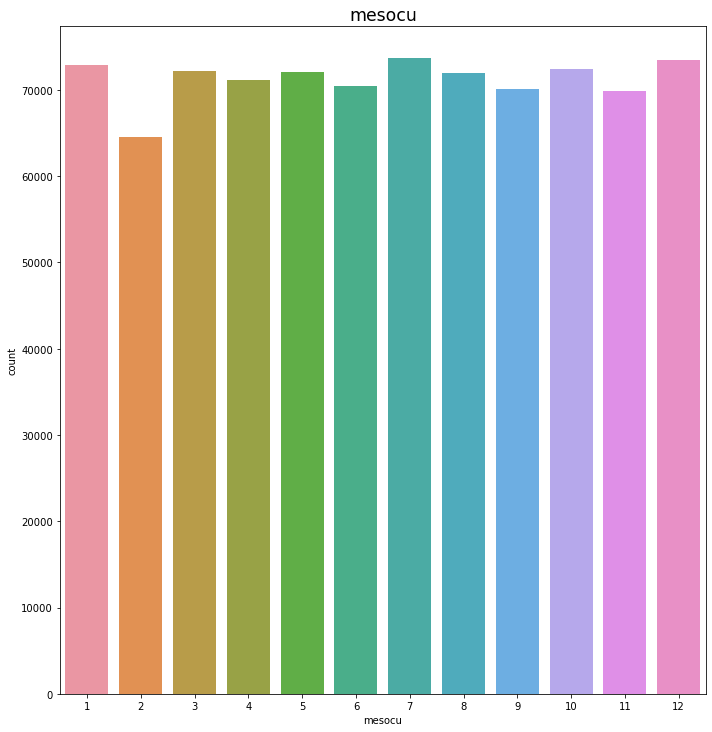

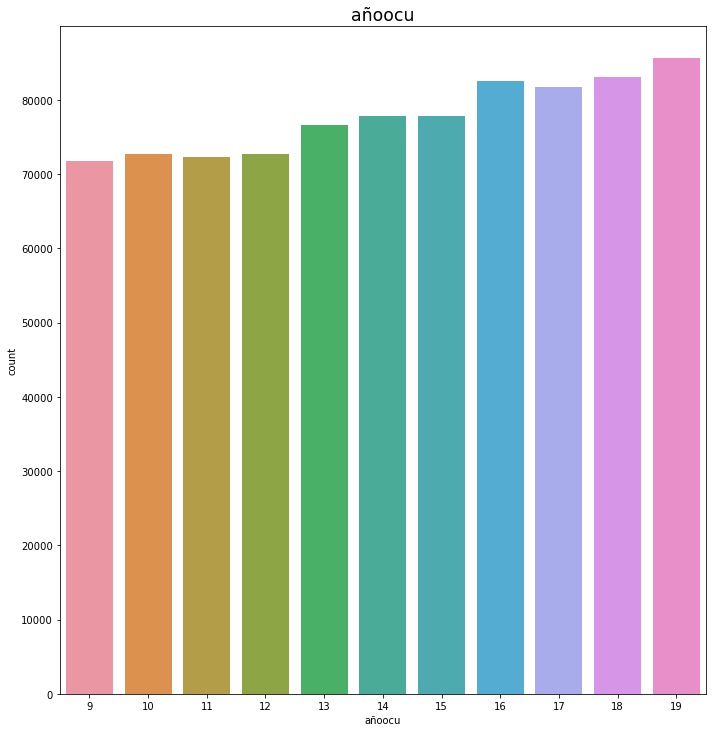

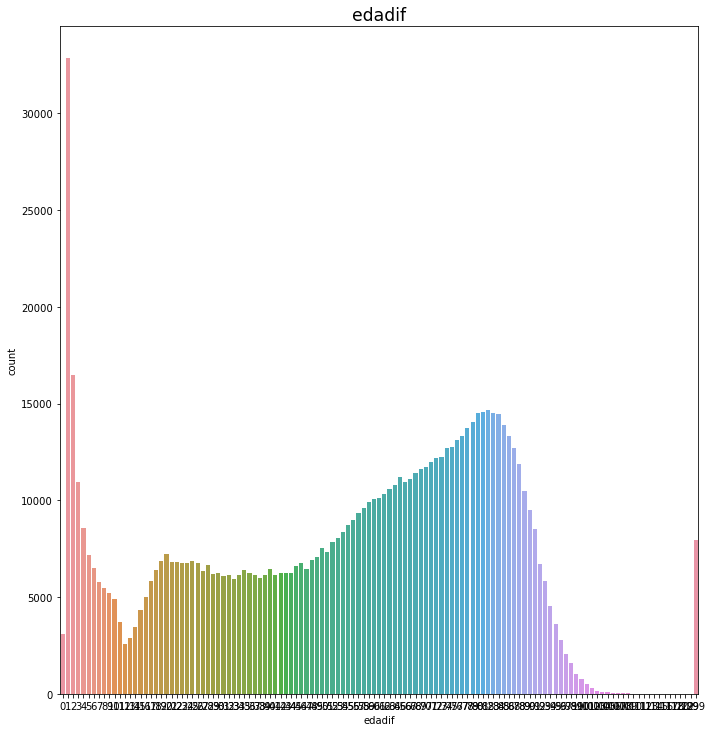

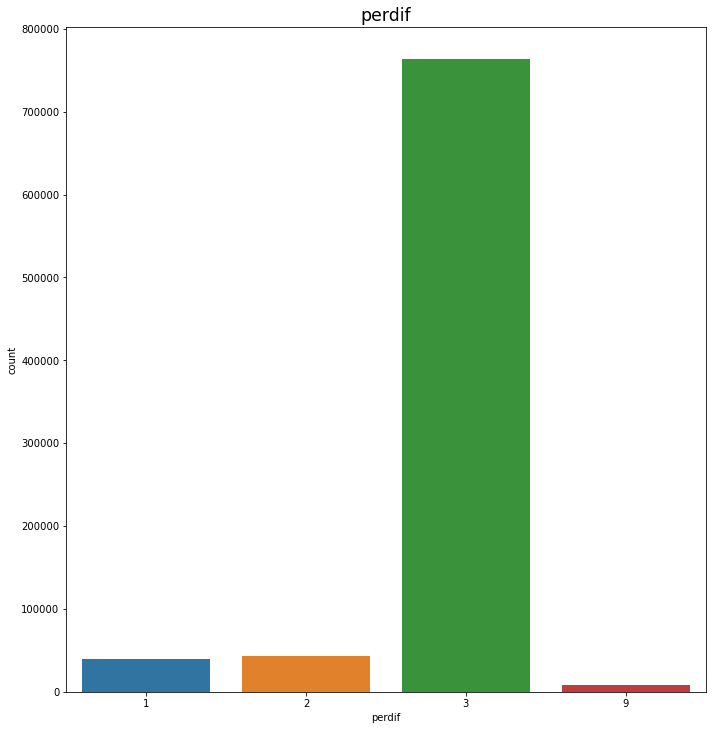

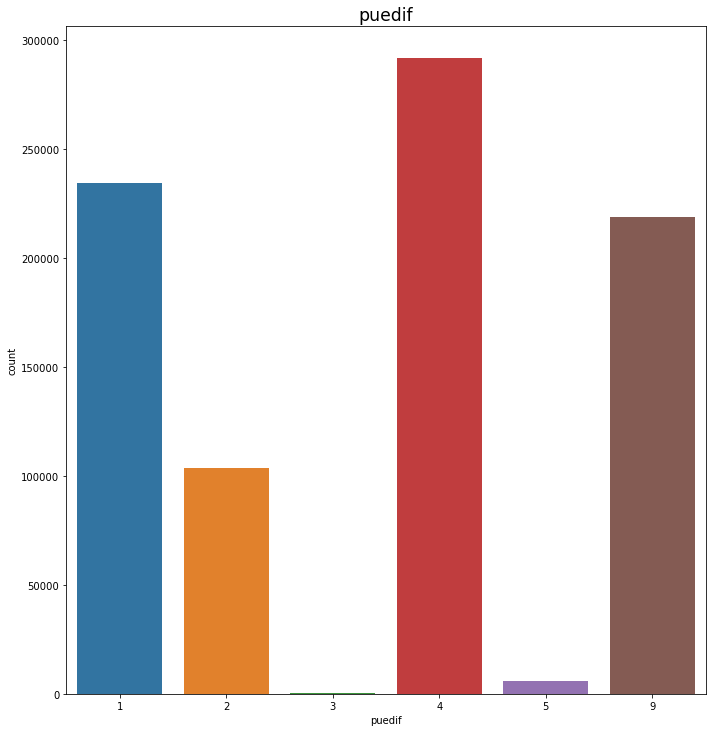

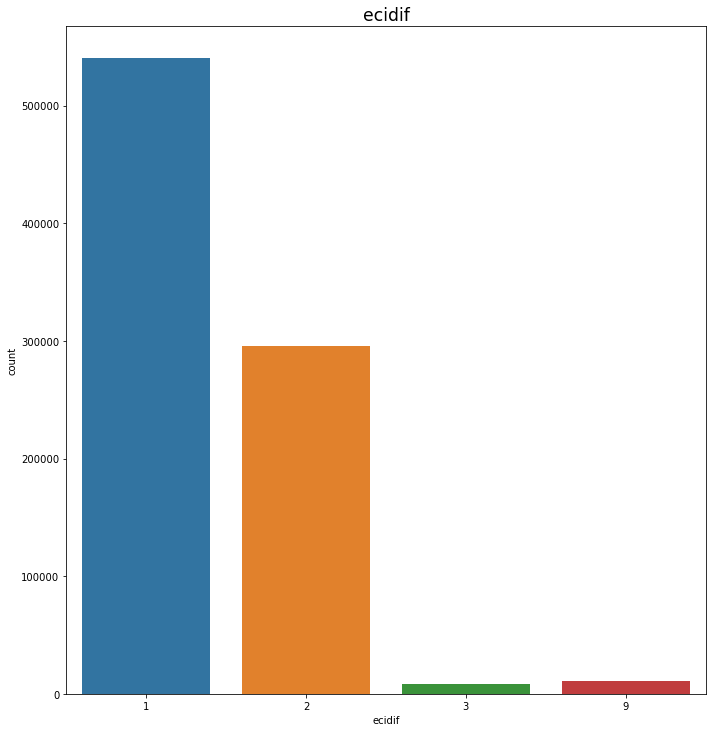

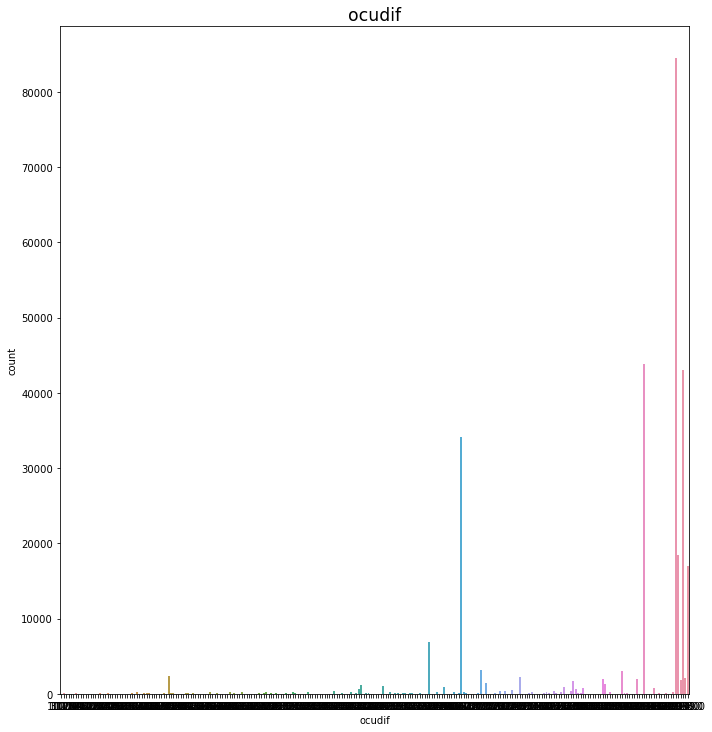

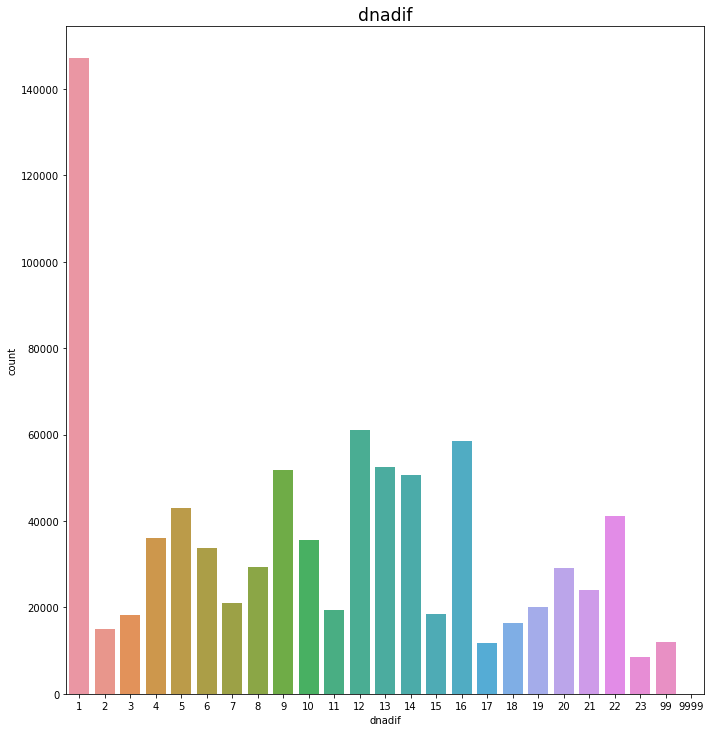

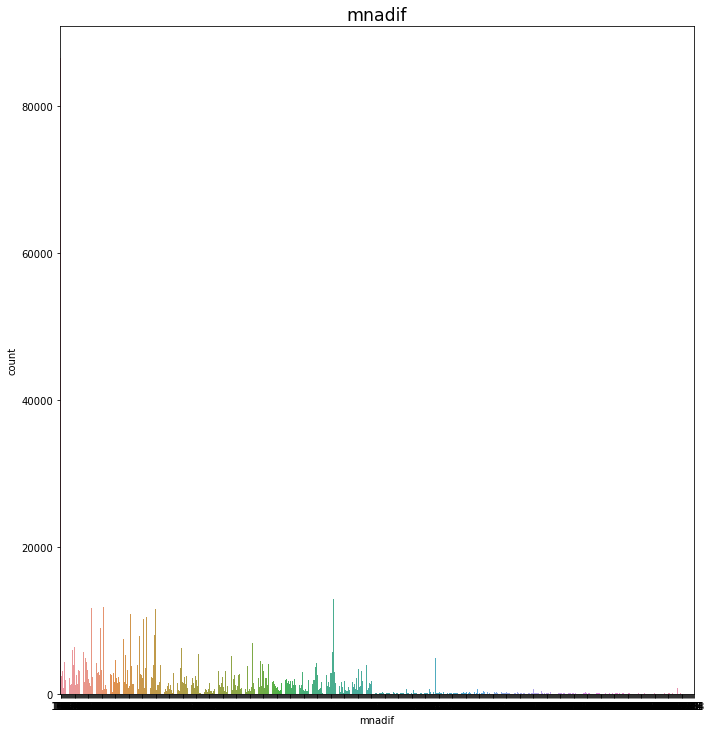

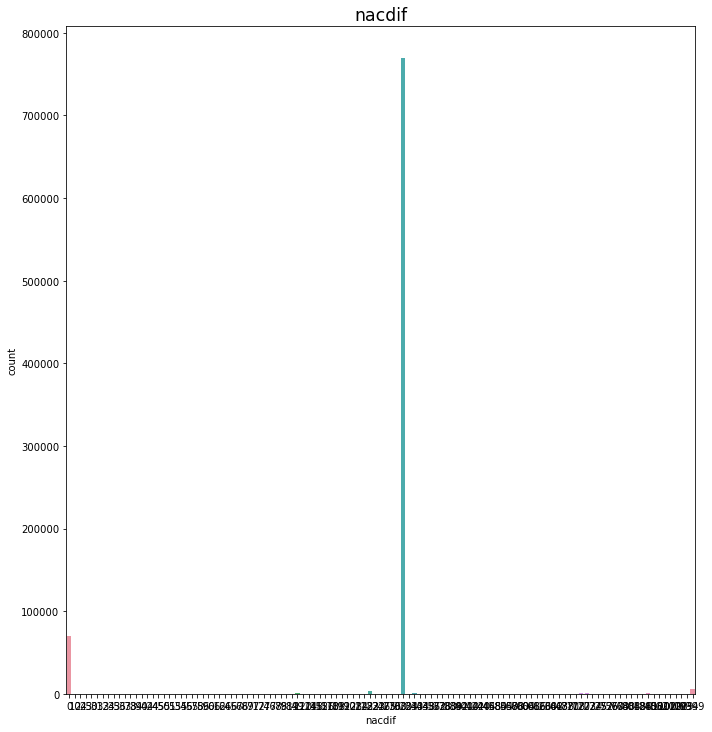

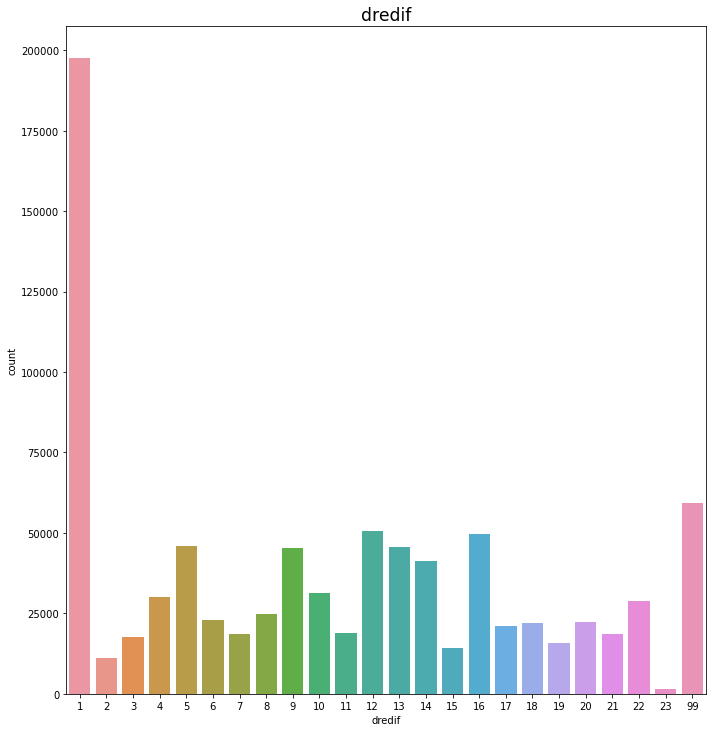

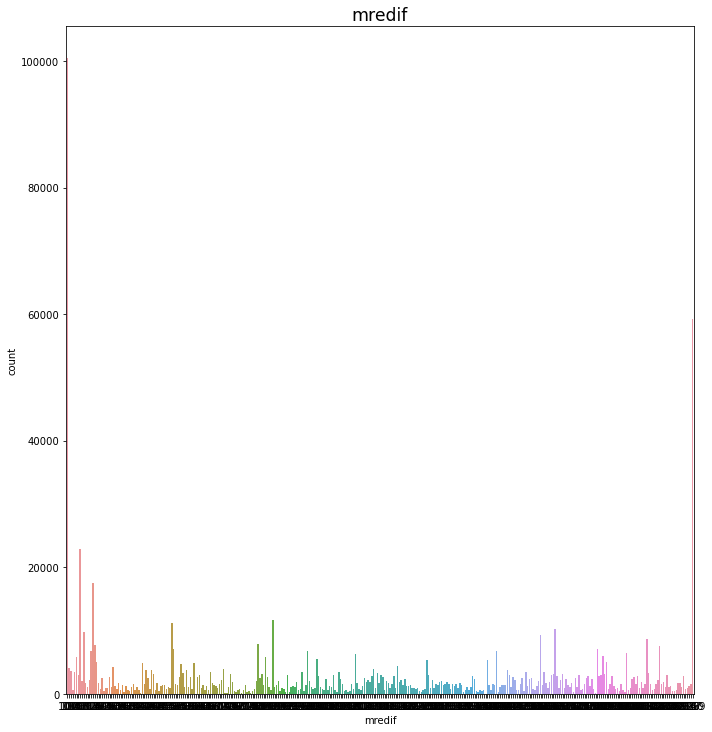

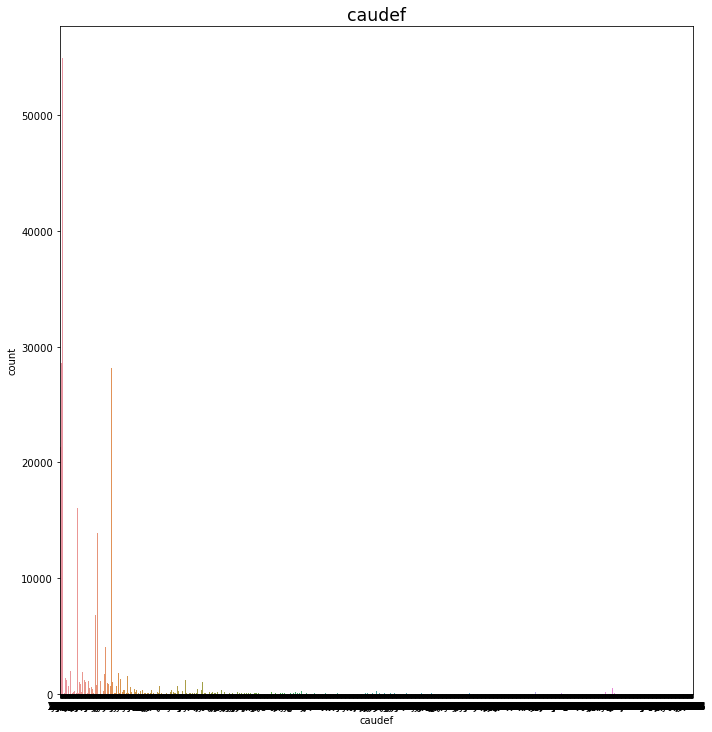

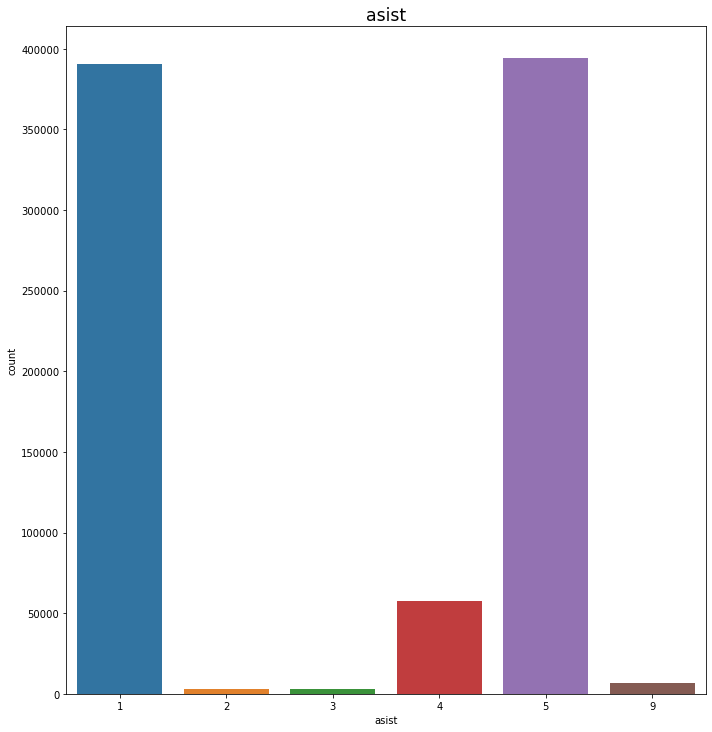

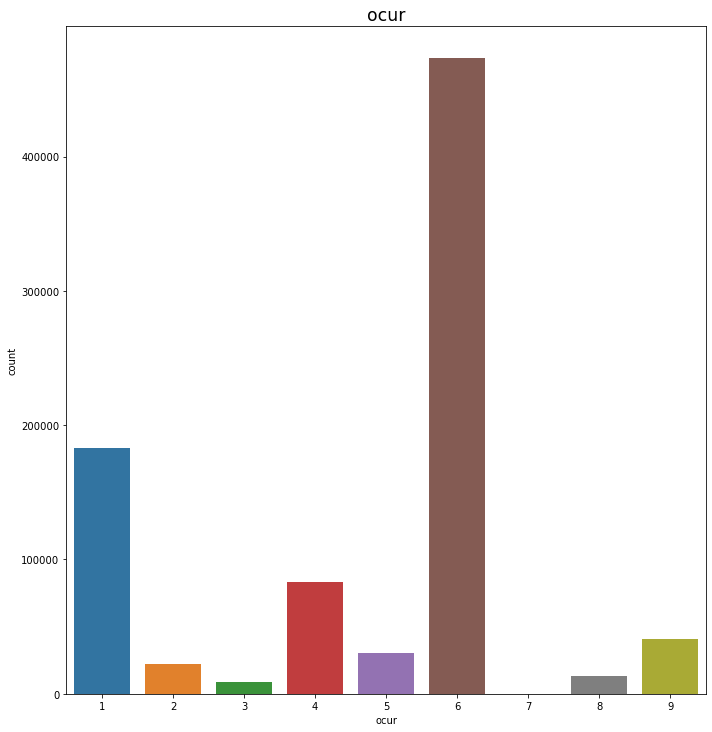

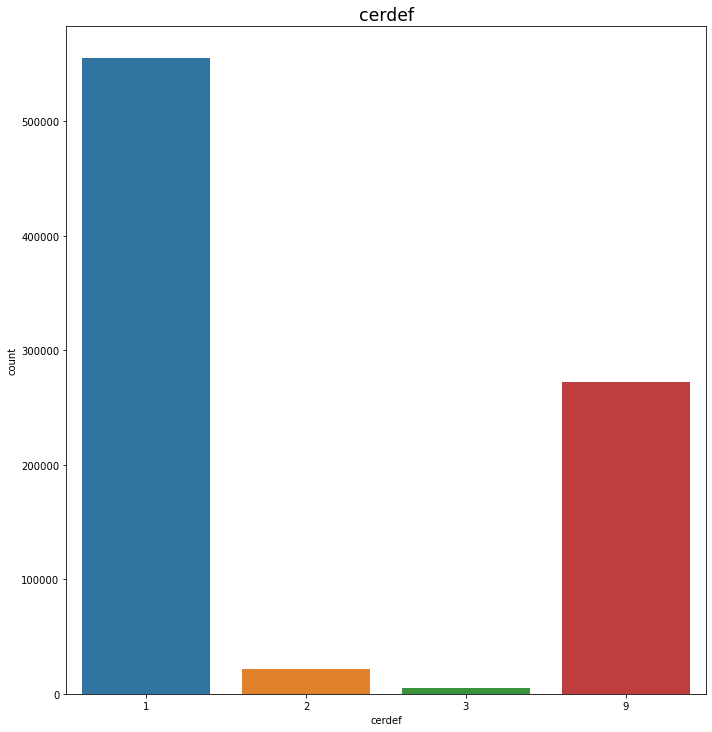

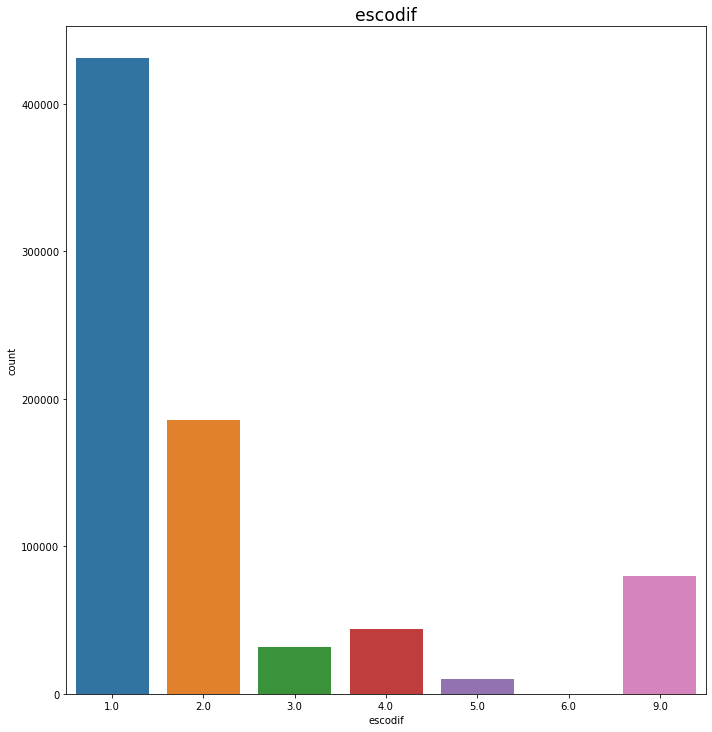

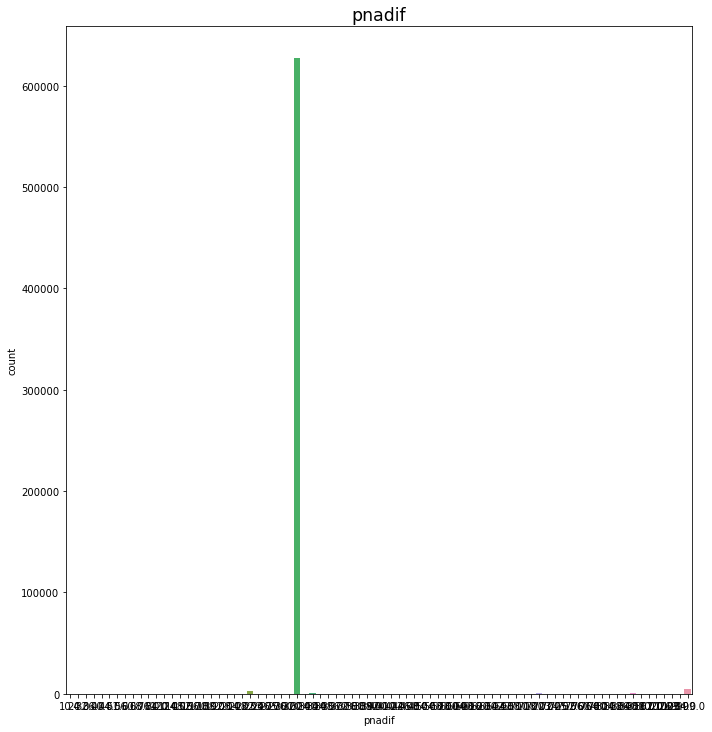

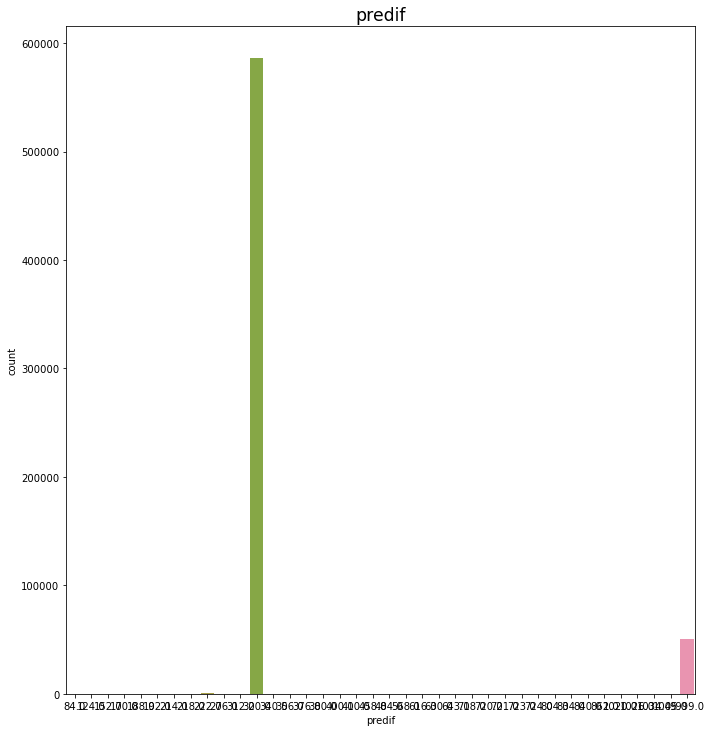

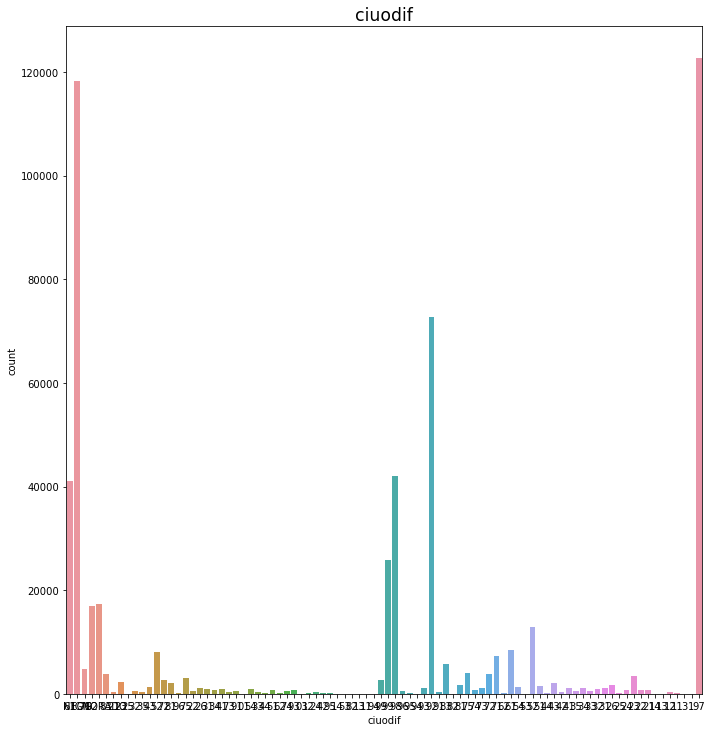

In [41]:
contador = 0
for i in range(0,len(columnas)):
    fig = plt.figure(figsize=(10,10))
    sns.countplot(data =df2, x = columnas[i])
    plt.tight_layout()
    plt.title(columnas[i], fontsize = "xx-large")
    fig.savefig("C:/Users/LENOVO/Desktop\Clases/Minería de datos/Github/ProyectoDataMining/Imagenes/"+columnas[i]+".jpg", bbox_inches ='tight')

C:\Users\LENOVO\anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


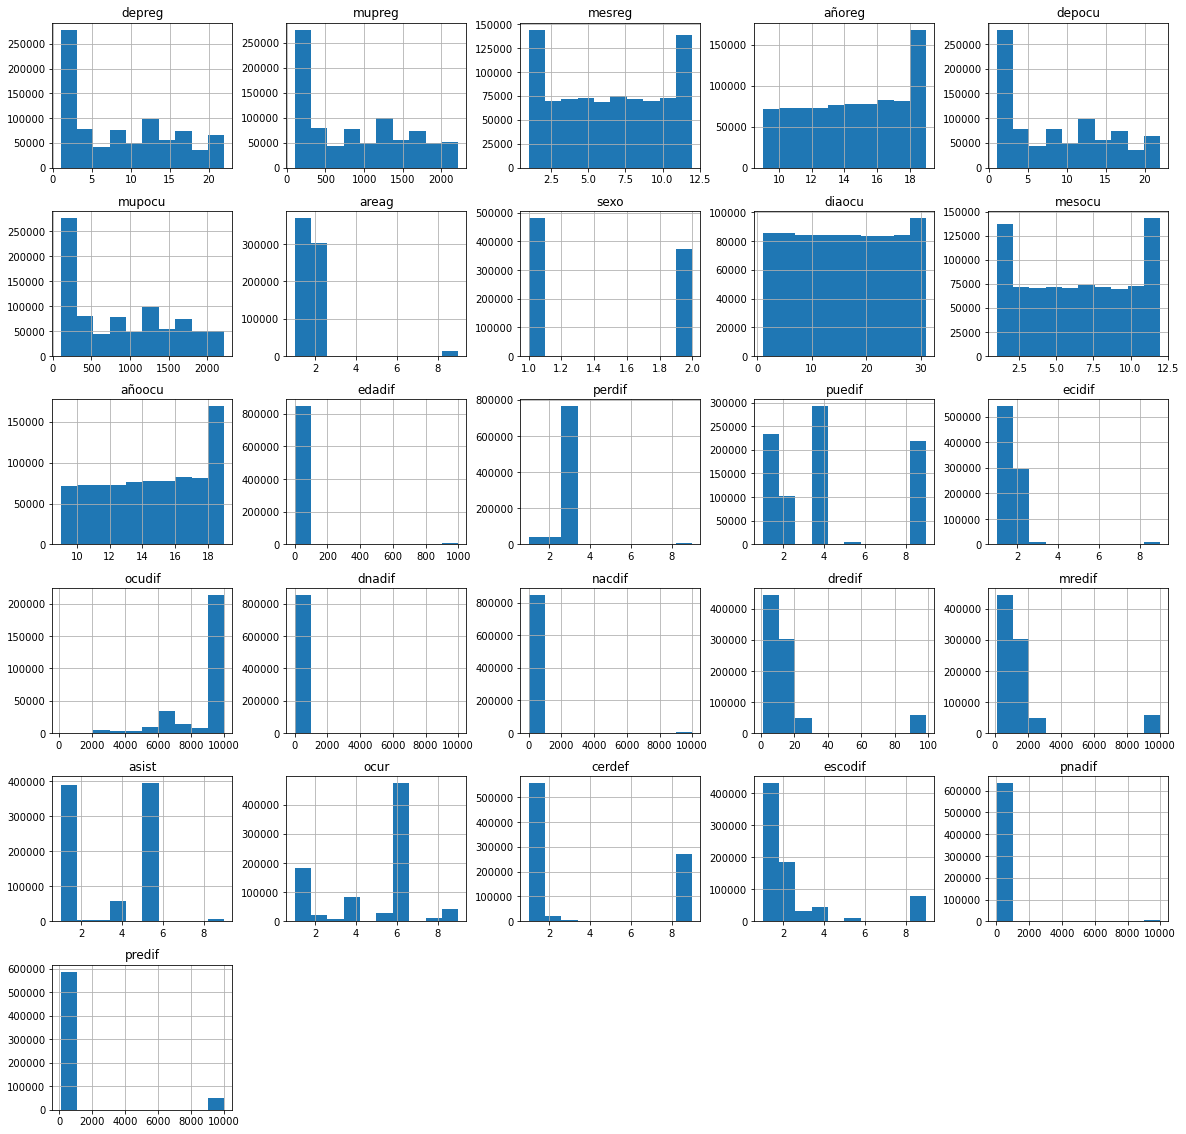

In [26]:
fig, ax = plt.subplots(figsize = (20,20))
df2.hist(ax = ax)
fig.savefig("C:/Users/LENOVO/Desktop\Clases/Minería de datos/Github/ProyectoDataMining/Imagenes/histogramas.pdf")